<a href="https://colab.research.google.com/github/carlowrp/ML-actuaria/blob/main/Modelo_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# modelo lineal para seguros medicos

## Data Understanding

In [1]:
pip install chainladder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00


In [2]:
#importar de librerías
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import chainladder as cl

In [3]:

import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Proyecto/medmal_pos.csv', 'r') as file:
    base = file.read()

In [4]:
csv_path = '/content/drive/MyDrive/Proyecto/medmal_pos.csv'

df = pd.read_csv(csv_path)

In [5]:
df

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
1,669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558
2,669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558
3,669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558
4,669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,44504,California Healthcare Ins Co Inc,1997,2002,6,3970,3971,-1,9711,5704,4007,1,15719
3396,44504,California Healthcare Ins Co Inc,1997,2003,7,3965,3965,0,9711,5704,4007,1,15719
3397,44504,California Healthcare Ins Co Inc,1997,2004,8,3965,3965,0,9711,5704,4007,1,15719
3398,44504,California Healthcare Ins Co Inc,1997,2005,9,3965,3965,0,9711,5704,4007,1,15719


### Interpretación de una observación


In [6]:
df[df["GRCODE"] == 44504].iloc[0]

GRCODE                                           44504
GRNAME                California Healthcare Ins Co Inc
AccidentYear                                      1988
DevelopmentYear                                   1988
DevelopmentLag                                       1
IncurLoss_F2                                         0
CumPaidLoss_F2                                       0
BulkLoss_F2                                          0
EarnedPremDIR_F2                                     0
EarnedPremCeded_F2                                   0
EarnedPremNet_F2                                     0
Single                                               1
PostedReserve97_F2                               15719
Name: 3300, dtype: object

### Resumen numérico

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GRCODE              3400 non-null   int64 
 1   GRNAME              3400 non-null   object
 2   AccidentYear        3400 non-null   int64 
 3   DevelopmentYear     3400 non-null   int64 
 4   DevelopmentLag      3400 non-null   int64 
 5   IncurLoss_F2        3400 non-null   int64 
 6   CumPaidLoss_F2      3400 non-null   int64 
 7   BulkLoss_F2         3400 non-null   int64 
 8   EarnedPremDIR_F2    3400 non-null   int64 
 9   EarnedPremCeded_F2  3400 non-null   int64 
 10  EarnedPremNet_F2    3400 non-null   int64 
 11  Single              3400 non-null   int64 
 12  PostedReserve97_F2  3400 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 345.4+ KB


In [8]:
df.describe()[['AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2',
       'EarnedPremCeded_F2', 'EarnedPremNet_F2', 'Single', 'PostedReserve97_F2']]

,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,1992.500000,1997.000000,5.500000,11609.344412,6706.067059,1095.803235,14111.605882,1803.497059,12308.108824,0.852941,57065.529412
std,2.872704,4.062617,2.872704,26802.819463,17121.815066,7612.672277,26399.284476,3893.424584,24824.225795,0.354217,134355.533990
min,1988.000000,1988.000000,1.000000,-17.000000,-1190.000000,-32101.000000,-781.000000,-6214.000000,-728.000000,0.000000,0.000000
25%,1990.000000,1994.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,629.000000
50%,1992.500000,1997.000000,5.500000,645.000000,187.000000,0.000000,1500.000000,106.500000,1302.000000,1.000000,5875.000000
75%,1995.000000,2000.000000,8.000000,9050.500000,4385.500000,107.250000,18094.500000,1473.500000,13490.000000,1.000000,46762.000000
max,1997.000000,2006.000000,10.000000,179425.000000,113189.000000,104402.000000,131948.000000,25553.000000,135318.000000,1.000000,702246.000000


In [9]:
df.describe(include=['object'])

,GRNAME
count,3400
unique,34
top,Scpie Indemnity Co
freq,100


In [10]:
df["GRNAME"].value_counts()

Scpie Indemnity Co                    100
Preferred Professional Ins Co         100
Nichido Fire & Marine Ins Co Ltd      100
Texas Hospital Ins Exch               100
State Volunteer Mut Ins Co            100
MHA Ins Co                            100
Health Care Ind Inc                   100
National Guardian RRG Inc             100
Medical Mut Ins Co Of ME              100
Promutual Grp                         100
Utah Medical Ins Assoc                100
Seguros Triples Inc                   100
Dentists Ins Co                       100
Physicians Recip Insurers             100
Louisiana Med Mut Ins Co              100
Clinic Mut Ins Co RRG                 100
Michigan Professional Ins Exch        100
National American Ins Co              100
NCMIC Ins Co                          100
Underwriters At Lloyds London         100
Community Blood Cntr Exch RRG         100
Campmed Cas & Ind Co Inc MD           100
Homestead Ins Co                      100
Franklin Cas Ins Co RRG           

In [11]:
df["GRCODE"].value_counts()

669      100
36234    100
32301    100
32514    100
33049    100
33111    100
35904    100
36072    100
36277    100
683      100
36676    100
40568    100
40975    100
41467    100
43656    100
43770    100
31429    100
23663    100
15865    100
15792    100
13893    100
12260    100
11460    100
10842    100
10697    100
10393    100
10341    100
10232    100
10115    100
10019    100
7854     100
1406     100
841      100
44504    100
Name: GRCODE, dtype: int64

In [12]:
#datos Nulos
nulos = pd.DataFrame([df.isnull().sum(), df.isna().sum()]).T
nulos.columns = ["nulos", "na"]
nulos

,nulos,na
GRCODE,0,0
GRNAME,0,0
AccidentYear,0,0
DevelopmentYear,0,0
DevelopmentLag,0,0
IncurLoss_F2,0,0
CumPaidLoss_F2,0,0
BulkLoss_F2,0,0
EarnedPremDIR_F2,0,0
EarnedPremCeded_F2,0,0


### como ver los datos graficos

In [13]:
df.columns

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2',
       'EarnedPremCeded_F2', 'EarnedPremNet_F2', 'Single',
       'PostedReserve97_F2'],
      dtype='object')

<ipython-input-16-5d21059bd8af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


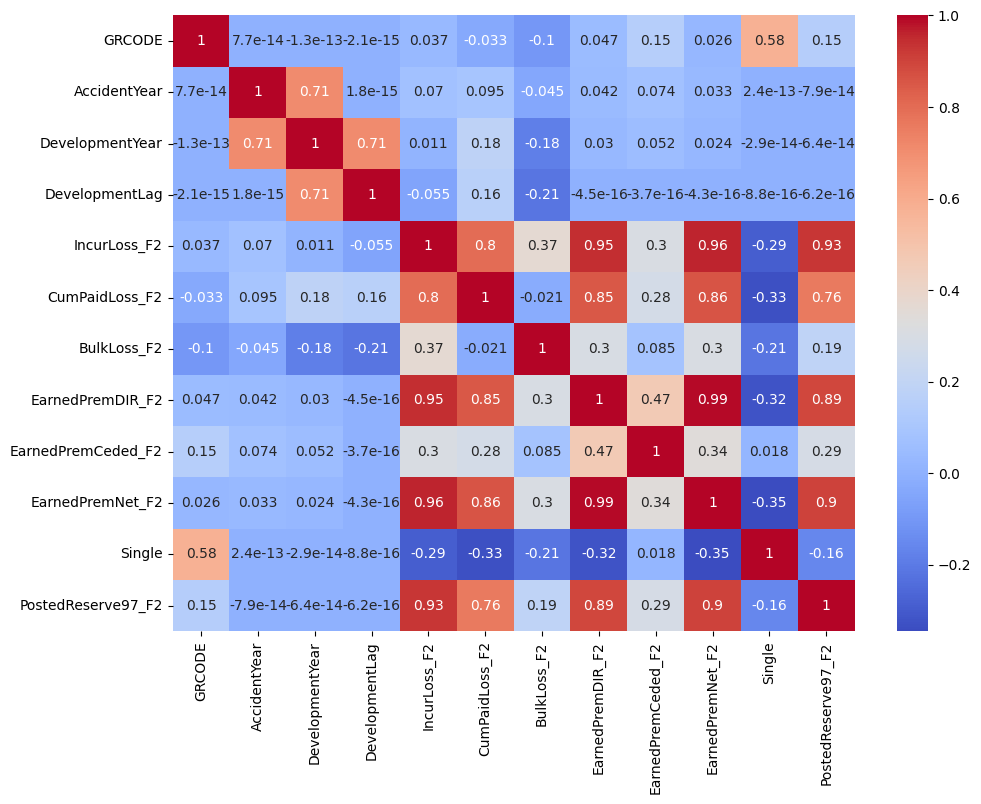

In [16]:
corr = df.corr()
plt.figure(figsize=(11, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

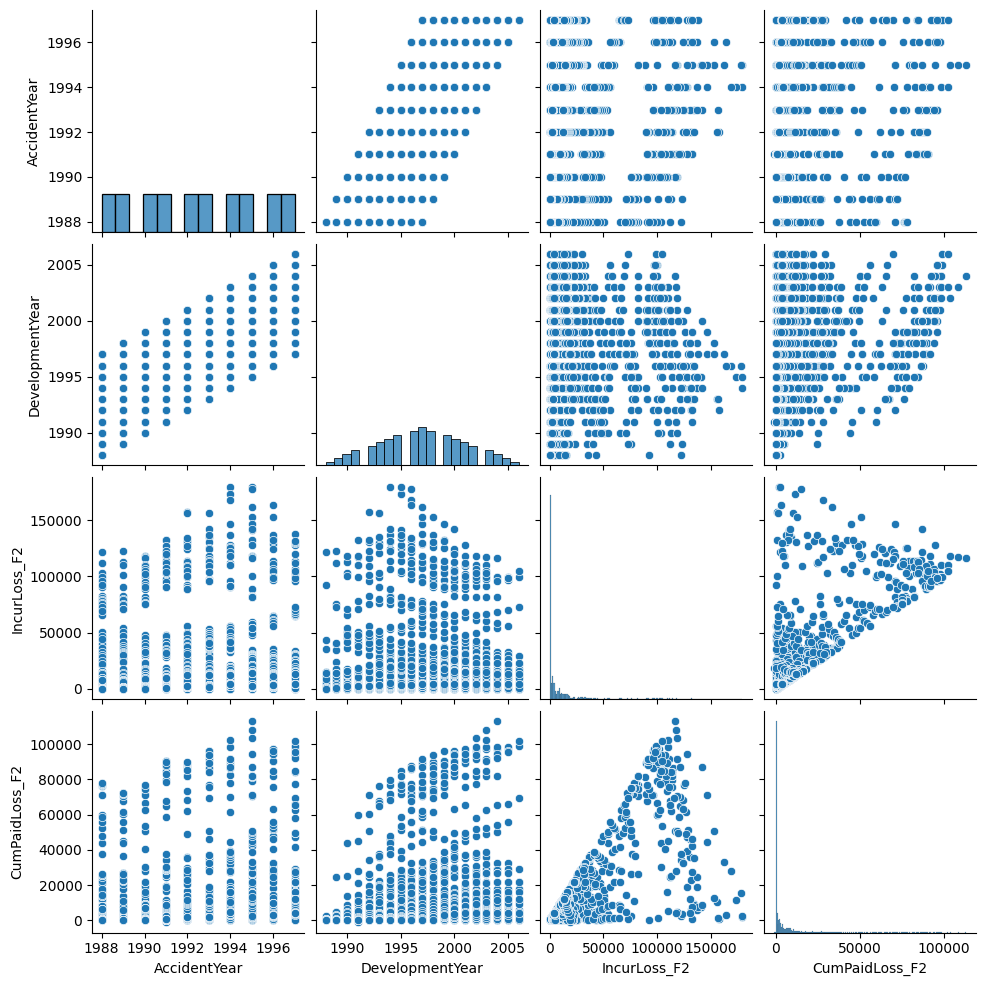

In [17]:
# Data visualization
sb.pairplot(df[['AccidentYear', 'DevelopmentYear', 'IncurLoss_F2', 'CumPaidLoss_F2']])
plt.show()

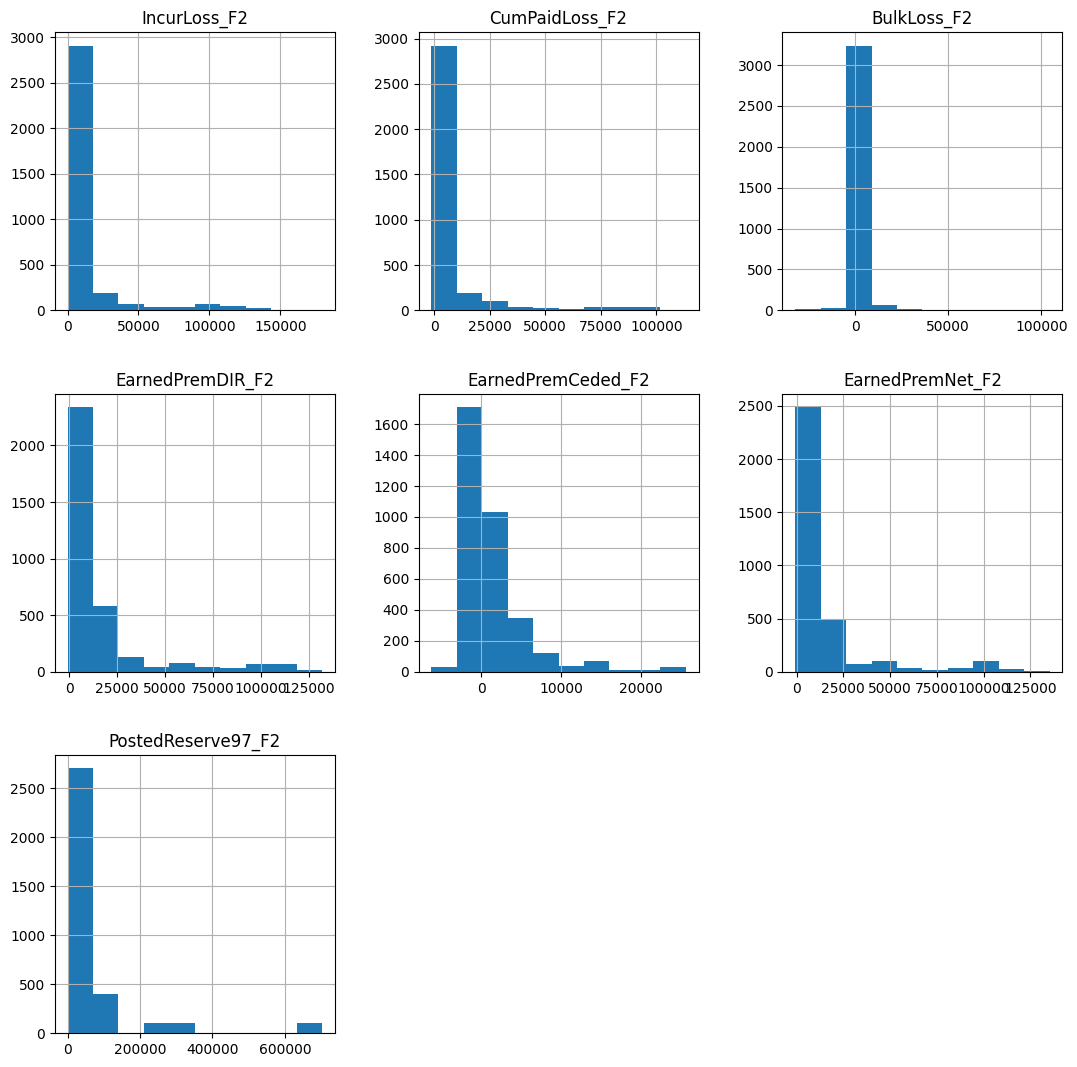

In [18]:
#Histogramas
#mnist.data.iloc[:,lista_columnas].hist(figsize=(16,16))
df[['IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2','EarnedPremCeded_F2', 'EarnedPremNet_F2', 'PostedReserve97_F2']].hist(figsize=(13,13))
plt.show()

# Grafica de barras para ver porcentajes para las variables categoricas

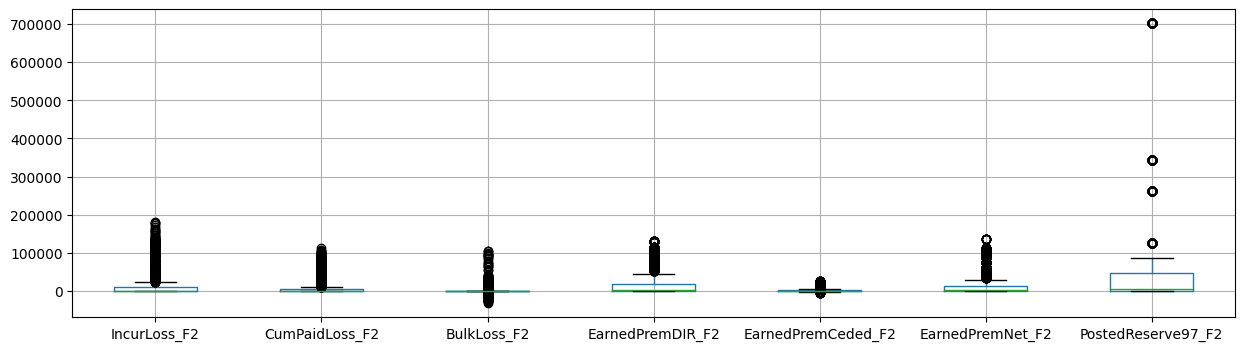

In [19]:
#Box-plot
df[['IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2','EarnedPremCeded_F2', 'EarnedPremNet_F2', 'PostedReserve97_F2']].boxplot(figsize=(15,4))
plt.show()

In [20]:
df.columns

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2',
       'EarnedPremCeded_F2', 'EarnedPremNet_F2', 'Single',
       'PostedReserve97_F2'],
      dtype='object')

In [21]:
df_1 = df.copy()
df_1[['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear','Single']] = df_1[['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear','Single']].astype(str)

# filas y columnas a utilizar

In [22]:
df.columns

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2',
       'EarnedPremCeded_F2', 'EarnedPremNet_F2', 'Single',
       'PostedReserve97_F2'],
      dtype='object')

In [24]:
df_col_seleccionado = df[['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2']]

In [25]:
Lista_entidades_ceros = df_col_seleccionado[df_col_seleccionado["IncurLoss_F2"] <= 0]["GRCODE"].unique()

# limpiar los datos

In [26]:
df_filtrado = df_col_seleccionado[~df_col_seleccionado["GRCODE"].isin(Lista_entidades_ceros)]

In [27]:
df_filtrado[df_filtrado["IncurLoss_F2"] <= 0]["GRCODE"].unique() #Verificación debe estar en vacio

array([], dtype=int64)

## triangulo con chain leadder

In [28]:
class ChainLadder:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = ""):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK

    def Triangulos(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        diccionario_todos_triangulos = {}

        for k in datos["GRCODE"].unique():

            Filtro_datos = datos[datos["GRCODE"] == k]

            Triangulo_full = Filtro_datos.pivot_table(values = "IncurLoss_C", index = "AccidentYear", columns='DevelopmentLag', aggfunc="sum", margins=False)

            Triangulo_full_acumulado = Triangulo_full.copy()

            num_filas = Triangulo_full_acumulado.shape[0]
            num_columnas = Triangulo_full_acumulado.shape[1]

            Triangulo_full_mitad = Triangulo_full.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_full_mitad.iloc[i, -j] = None  # Puedes establecerlo en None u otro valor si lo prefieres

            for indice, i in enumerate(range(1,num_columnas+1)):
                Triangulo_full_acumulado[Triangulo_full.columns[indice]] = Triangulo_full[Triangulo_full.columns[0:i]].sum(axis = 1)

            Triangulo_acumulado_mitad = Triangulo_full_acumulado.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_acumulado_mitad.iloc[i, -j] = None  # Puedes establecerlo en None u otro valor si lo prefieres

            factores0 = Triangulo_acumulado_mitad.sum(axis = 0) # Rojo
            factores1 = Triangulo_acumulado_mitad.sum(axis = 0)-np.flip(np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)) # Azul
            factores0 = factores0[1:10]
            factores1 = factores1[0:-1]
            factores = factores0.reset_index(drop = True) / factores1.reset_index(drop = True)

            Triangulo_estimado = Triangulo_acumulado_mitad.copy()
            for i in list(reversed(range(num_filas))):
                comodin = np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)[i]
                for j in range(1,i+1):
                    Triangulo_estimado.iloc[i, -j] = comodin*factores.iloc[-i+9:-j+10].prod()   # Puedes establecerlo en None u otro valor si lo prefieres



            reserva_total = sum(np.array(list(reversed(np.array(Triangulo_estimado[10]))))-np.flip(np.diag(np.fliplr(Triangulo_estimado), 0)))

            diciconario_triangulo = {'Triangulo_full':Triangulo_full, "Triangulo_full_mitad":Triangulo_full_mitad, "Triangulo_full_acumulado":Triangulo_full_acumulado,
                                     "Triangulo_acumulado_mitad":Triangulo_acumulado_mitad, "factores":factores, "Triangulo_estimado":Triangulo_estimado,
                                     "reserva_total":reserva_total}

            nombre = k
            diccionario_todos_triangulos[nombre] = diciconario_triangulo

        return diccionario_todos_triangulos



In [29]:
df_filtrado["GRCODE"].unique()

array([  669,   683,  7854, 32514, 33049, 33111, 36234, 36277, 36676,
       40568, 40975, 41467, 43656, 43770])

In [31]:
resultados = ChainLadder(tabla = df_filtrado, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_F2", index = "GRCODE")
triangulos_resultados = resultados.Triangulos()

In [ ]:
prueba = triangulos_resultados[353]["Triangulo_full_mitad"]
prueba

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,3087,3830.0,3729.0,3856.0,3893.0,3905.0,3918.0,3918.0,3917.0,3917.0
1989,3167,2850.0,2690.0,2533.0,2528.0,2533.0,2543.0,2544.0,2539.0,NaN
1990,3436,3493.0,3583.0,4030.0,4112.0,4088.0,4114.0,4172.0,NaN,NaN
1991,4039,3975.0,3799.0,4041.0,4320.0,4334.0,4343.0,NaN,NaN,NaN
1992,3438,3175.0,3240.0,3565.0,3551.0,3568.0,NaN,NaN,NaN,NaN
1993,4282,4322.0,3670.0,3334.0,3285.0,NaN,NaN,NaN,NaN,NaN
1994,4064,4734.0,5156.0,5311.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,4189,3881.0,3950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,4270,4032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**regresion lineal**

In [65]:
class LassoRegression:
    def __init__(self, alpha=1.0, max_iters=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X, y):
        n, p = X.shape[0], X.shape[1]
        self.beta = np.zeros(p)

        i = 0
        for _ in range(self.max_iters):
            beta_prev = np.copy(self.beta)
            i = i + 1
            for j in range(p):
                residuals = y - X.dot(self.beta)
                xj = X[:, j]
                rho = xj.dot(residuals)

                soft_threshold = np.sign(rho) * max(0, abs(rho) - self.alpha)
                self.beta[j] = soft_threshold / (xj.dot(xj))

            if np.linalg.norm(self.beta - beta_prev, ord=1) < self.tol:
                break
        return(i)

    def predict(self, X):
        return X.dot(self.beta)

In [66]:
class Reserva_Regresion_lineal:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = "", alpha = 1):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK
        self.alpha = alpha #OK

    def Regresion_lineal(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_F2",
                                          self.index: "GRCODE"})

        resultados = ChainLadder(tabla = datos, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_F2", index = "GRCODE")
        triangulos_resultados = resultados.Triangulos()

        #triangulos_resultados
        from sklearn.linear_model import Lasso
        from sklearn.linear_model import Ridge

        size = triangulos_resultados[datos["GRCODE"].unique()[0]]["Triangulo_acumulado_mitad"].shape[0]#10
        size1 =  size**2 #100
        size2 = (size1-size)/2 + size #55
        cant_parametros = size*2-1 #19
        matriz_de_ceros = np.zeros((size1, cant_parametros)) #matriz de ceros
        matriz_de_ceros[:,0] = 1 #columna 0 se llene de unos
        for i in range(size): #recorre las columnas
            for j in range(size): #recorre las filas
                k = i*10+j
                if i != 0:
                    matriz_de_ceros[k,i] = 1
                if j != 0:
                    matriz_de_ceros[k,j+9] = 1

        self.matriz_de_ceros = pd.DataFrame(matriz_de_ceros)

        Y = pd.DataFrame()
        Y_completo = pd.DataFrame()
        matriz_X = pd.DataFrame()
        for i in datos["GRCODE"].unique():#[3492]:#
            triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
            triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
            triangulo_log =  np.log(triangulo)
            triangulo_completo_log = np.log(triangulo_completo)
            vector_Y = pd.melt(triangulo_log)
            vector_Y_completo = pd.melt(triangulo_completo_log)
            vector_Y["GRCODE"] = i
            Y = pd.concat([Y,vector_Y], axis = 0)
            Y_completo = pd.concat([Y_completo,vector_Y_completo], axis = 0)
            matriz_X = pd.concat([matriz_X, self.matriz_de_ceros], axis = 0)

        matriz_X = matriz_X.reset_index(drop=True)
        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        matriz_regresion = pd.concat([Y[["value", "GRCODE"]], Y_completo, matriz_X], axis = 1)
        matriz_regresion = matriz_regresion.reset_index(drop=True)
        matriz_regresion1 = matriz_regresion[~matriz_regresion["value"].isnull()]
        matriz_regresion1.columns = ['Z', "GRCODE", "Z_completo", "u", "alpha1", "alpha2", "alpha3", "alpha4", "alpha5",
                                    "alpha6", "alpha7", "alpha8", "alpha9", "beta1", "beta2", "beta3",
                                    "beta4", "beta5", "beta6", "beta7", "beta8", "beta9"]
        matriz_regresion1 = matriz_regresion1.reset_index(drop=True)
        X = matriz_regresion1.iloc[:,3:]
        Y = matriz_regresion1.iloc[:,0]
        XX = np.dot(X.T,X)
        ##########
        #lambda_ridge = 0
        XX_ridge = np.dot(X.T,X)+X.shape[0]*self.alpha*np.identity(XX.shape[0])
        inversa_XX = np.linalg.inv(XX)
        inversa_XX_ridge = np.linalg.inv(XX_ridge)
        self.B = np.dot(np.dot(inversa_XX,X.T),Y)
        self.B_ridge = np.dot(np.dot(inversa_XX_ridge,X.T),Y)
        #ridge sklearn
        self.ridge_model = Ridge(alpha = self.alpha)
        self.ridge_model.fit(np.array(X), np.array(Y))
        self.B_ridge_1 = self.ridge_model.coef_
        #####################
        alpha_lasso = 0
        self.lasso_model = Lasso(alpha = self.alpha)
        self.lasso_model.fit(np.array(X), np.array(Y))
        self.B_lasso = self.lasso_model.coef_
        #lasso.fit(np.array(X), np.array(Y))
        X_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,3:]
        Y_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,2]
        Y_codigo_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,1]
        Y_codigo_test.reset_index(drop=True)
        Y_Ajustado = np.dot(X_test,self.B)
        Y_Ajustado_ridge = np.dot(X_test,self.B_ridge)
        Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        Y_Ajustado_lasso = self.lasso_model.predict(X_test)
        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        #metrica
        comparacion["GRCODE"] = np.array(Y_codigo_test)

        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}

        return diccionario_resultados

    def predict(self, datos_new):

        resultados = ChainLadder(tabla = datos_new, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_F2", index = "GRCODE")
        triangulos_resultados = resultados.Triangulos()

        i = datos_new["GRCODE"].unique()[0]
        triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
        triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
        triangulo_log =  np.log(triangulo)
        triangulo_completo_log = np.log(triangulo_completo)
        vector_Y = pd.melt(triangulo_log)
        vector_Y_completo = pd.melt(triangulo_completo_log)
        vector_Y["GRCODE"] = i
        Y = vector_Y
        Y_completo = vector_Y_completo

        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        X = self.matriz_de_ceros

        matriz_new = pd.concat([Y[["value", "GRCODE"]], Y_completo, X], axis = 1)
        matriz_new = matriz_new.reset_index(drop=True)

        Y_test = matriz_new[matriz_new["value"].isnull()].iloc[:,2]
        X_test = matriz_new[matriz_new["value"].isnull()].iloc[:,3:]

        Y_Ajustado = np.dot(X_test,self.B)
        Y_Ajustado_ridge = np.dot(X_test,self.B_ridge)
        Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        Y_Ajustado_lasso = self.lasso_model.predict(X_test)

        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        #metrica
        comparacion["GRCODE"] = np.array(i)

        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados_test = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}

        return diccionario_resultados_test



In [67]:
df_filtrado_unico = df_filtrado[df_filtrado["GRCODE"] == 15199]
df_filtrado_unico1 = df_filtrado[df_filtrado["GRCODE"] == 35483]
df_filtrado #Dataframe completo con todas las aseguradoras

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905
1,669,Scpie Indemnity Co,1988,1989,2,112211
2,669,Scpie Indemnity Co,1988,1990,3,103226
3,669,Scpie Indemnity Co,1988,1991,4,99599
4,669,Scpie Indemnity Co,1988,1992,5,96006
...,...,...,...,...,...,...
3295,43770,Clinic Mut Ins Co RRG,1997,2002,6,886
3296,43770,Clinic Mut Ins Co RRG,1997,2003,7,732
3297,43770,Clinic Mut Ins Co RRG,1997,2004,8,732
3298,43770,Clinic Mut Ins Co RRG,1997,2005,9,709


In [68]:
resultados1 = Reserva_Regresion_lineal(tabla = df_filtrado, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_F2", index = "GRCODE", alpha = 0.01)
resultados_regresion = resultados1.Regresion_lineal()

In [69]:
resultados_regresion["Metricas MSE"]

{'MSE': 1.5034406301331495,
 'MSE_ridge_1': 1.5034892231576495,
 'MSE_lasso': 1.5436483086961101}

In [70]:
resultados_regresion["Metricas MAPE"]

{'MAPE': 10.35805044207971,
 'MAPE_ridge_1': 10.357956253072436,
 'MAPE_lasso': 10.52591488522263}

In [71]:
resultados_regresion["coeficientes"]

{'Coef_normal': array([ 9.11028838, -0.05366319, -0.12604845, -0.22685027, -0.28797468,
        -0.35457203, -0.39991772, -0.49217904, -0.49546519, -0.51181813,
         0.29862739,  0.39832096,  0.53248843,  0.60872173,  0.63867745,
         0.75294324,  0.81777038,  0.84446757,  0.69437918]),
 'Coef_ridge1': array([ 0.        , -0.05348009, -0.1258851 , -0.2266976 , -0.28783247,
        -0.35443576, -0.39978978, -0.4920477 , -0.49534957, -0.51172692,
         0.29820136,  0.39788151,  0.53203047,  0.60824541,  0.63818371,
         0.75240979,  0.81718602,  0.84380035,  0.69360943]),
 'Coef_lasso': array([ 0.        ,  0.10039137,  0.00326578, -0.        , -0.02269023,
        -0.08924744, -0.13454407, -0.22673681, -0.22135766, -0.11202378,
        -0.        ,  0.        ,  0.11711175,  0.19337929,  0.22337288,
         0.33768519,  0.38977762,  0.34223735,  0.        ])}

In [87]:
resultados_regresion["X"]

,u,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,beta1,beta2,beta3,beta4,beta5,beta6,beta7,beta8,beta9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
767,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
resultados_regresion["Comparacion"]

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_ridge_1,Y_ajustado_lasso,GRCODE
0,11.757650,9.751004,9.726414,9.750692,9.360883,669
1,11.640835,9.828707,9.780511,9.828478,9.605994,669
2,11.644454,9.678619,9.653151,9.678287,9.263757,669
3,11.513425,9.701208,9.674030,9.701051,9.650269,669
4,11.554768,9.727906,9.683014,9.727665,9.602729,669
...,...,...,...,...,...,...
625,7.621195,9.237148,9.341321,9.237019,9.371840,43770
626,7.867106,9.351413,9.442411,9.351246,9.486153,43770
627,7.585281,9.416241,9.493429,9.416022,9.538245,43770
628,7.480992,9.442938,9.502413,9.442636,9.490705,43770


In [90]:
resultados_regresion_prediccion = resultados1.predict(df_filtrado_unico)
resultados_regresion_prediccion1 = resultados1.predict(df_filtrado_unico1)


IndexError: ignored

In [86]:
resultados_regresion_prediccion["Metricas MAPE"]

NameError: ignored

In [ ]:
metricas_model1 = pd.DataFrame(resultados_regresion_prediccion["Metricas MAPE"], index = [0]).T
metricas_model2 = pd.DataFrame(resultados_regresion_prediccion1["Metricas MAPE"], index = [0]).T

In [ ]:
metricas_model1 = pd.DataFrame(resultados_regresion_prediccion["Metricas MAPE"], index = [0]).T
metricas_model2 = pd.DataFrame(resultados_regresion_prediccion1["Metricas MAPE"], index = [0]).T
metricas_model1.index = ['model1_MAPE', 'model1_MAPE_ridge_1', 'model1_MAPE_lasso']
metricas_model2.index = ['model2_MAPE', 'model2_MAPE_ridge_1', 'model2_MAPE_lasso']
metricas_modelos = pd.concat([metricas_model1, metricas_model2], axis = 0)
metricas_modelos.columns = ["MAPE"]
mejor_modelo = metricas_modelos[metricas_modelos["MAPE"] == metricas_modelos["MAPE"].sort_values()[0]]

In [79]:
mejor_modelo

NameError: ignored

In [80]:
dict(sorted(resultados_regresion_prediccion["Metricas MAPE"].items(), key=lambda item: item[1]))

NameError: ignored

In [81]:
diccionario_ordenado = dict(sorted(resultados_regresion_prediccion["Metricas MAPE"].items()))

for key, value in diccionario_ordenado.items():
    print(key, value)

NameError: ignored

In [82]:
diccionario_ordenado

NameError: ignored

In [ ]:
resultados_regresion_prediccion["Comparacion"]

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_ridge_1,Y_ajustado_lasso,GRCODE
0,5.257495,4.996651,5.308909,5.008843,5.477385,35483
1,5.641907,4.537296,4.849130,4.546491,5.058308,35483
2,5.579730,4.935302,5.283745,4.948583,5.477385,35483
3,5.176150,5.458043,5.549359,5.461546,5.477385,35483
4,5.545177,4.529492,4.852508,4.539134,5.058308,35483
5,5.402677,4.927498,5.287123,4.941225,5.477385,35483
6,3.433987,5.051450,5.189011,5.055671,5.339750,35483
7,5.049856,5.436103,5.547237,5.440239,5.477385,35483
8,5.545177,4.507552,4.850386,4.517827,5.058308,35483
9,5.442418,4.905558,5.285001,4.919919,5.477385,35483


In [ ]:
df_filtrado["GRCODE"].unique()

array([  337,   353,   388,   620,   671,   715,   833,   965,  1066,
        1090,  1538,  1716,  1767,  2003,  2135,  2143,  2208,  2623,
        2712,  3240,  3492,  4839,  5185,  5320,  6408,  6459,  6777,
        6947,  7080,  8079,  8427,  8559,  8672,  9466, 10022, 10308,
       10859, 11037, 11118, 11126, 11460, 12866, 13439, 13501, 13528,
       13587, 13641, 13889, 13943, 14044, 14176, 14257, 14311, 14320,
       14508, 14974, 15024, 15199, 18163, 18767, 18791, 19020, 19780,
       21172, 21270, 23663, 25275, 26077, 26433, 26905, 27022, 27065,
       28258, 29378, 29440, 31550, 32301, 32875, 34606, 35408, 35483,
       37036, 38733, 38997, 40568, 41300, 44130, 44598], dtype=int64)

In [ ]:
np.log(triangulos_resultados[15199]["Triangulo_full"])

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,6.018593,6.376727,5.323010,5.505332,5.476464,5.476464,5.476464,5.476464,5.476464,5.472271
1989,5.521461,4.644391,4.736198,4.804021,4.844187,4.844187,4.844187,4.844187,4.844187,4.844187
1990,6.408529,5.579730,5.579730,5.575949,5.575949,5.575949,5.575949,5.575949,5.575949,5.575949
1991,5.170484,4.510860,4.477337,4.477337,4.477337,4.477337,4.465908,4.465908,4.465908,4.465908
1992,5.968708,5.932245,5.720312,5.758902,5.768321,5.771441,5.771441,5.771441,5.771441,5.771441
1993,5.153292,4.553877,4.852030,4.820282,4.820282,4.820282,4.820282,4.820282,4.820282,4.820282
1994,5.252273,5.099866,5.231109,5.225747,5.225747,5.225747,5.225747,5.225747,5.225747,5.225747
1995,5.472271,5.648974,5.768321,5.783825,5.774552,5.774552,5.774552,5.774552,5.774552,5.774552
1996,5.135798,4.430817,4.488636,4.787492,4.990433,5.105945,5.153292,4.997212,4.997212,4.997212


In [ ]:
resultados_regresion["Comparacion"]["Y_test"].sort_values()

2196     1.098612
1971     1.098612
3623     1.609438
3610     1.609438
3640     1.609438
          ...    
572     12.403603
564     12.404124
581     12.407756
551     12.407939
557     12.408417
Name: Y_test, Length: 3960, dtype: float64

In [ ]:
type(Y_codigo_test)

pandas.core.series.Series

In [ ]:
comparacion

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_lasso,GRCODE
0,2.302585,7.521534,7.521534,19.284711,337
1,4.672829,7.526334,7.526334,10.230838,337
2,2.302585,7.540736,7.540736,20.910205,337
3,4.969813,7.553327,7.553327,8.633904,337
4,4.682131,7.503037,7.503037,9.222768,337
...,...,...,...,...,...
3955,4.189655,7.345844,7.345844,15.414169,44598
3956,4.969813,7.506368,7.506368,19.708454,44598
3957,5.796058,7.542573,7.542573,14.047031,44598
3958,3.806662,7.492283,7.492283,14.635895,44598


In [ ]:
comparacion

,Y_test,Y_ajustado,Y_ajustado_ridge,Y_ajustado_lasso
0,2.302585,7.521534,7.521534,19.284711
1,4.672829,7.526334,7.526334,10.230838
2,2.302585,7.540736,7.540736,20.910205
3,4.969813,7.553327,7.553327,8.633904
4,4.682131,7.503037,7.503037,9.222768
...,...,...,...,...
3955,4.189655,7.345844,7.345844,15.414169
3956,4.969813,7.506368,7.506368,19.708454
3957,5.796058,7.542573,7.542573,14.047031
3958,3.806662,7.492283,7.492283,14.635895


# CROSS VALIDATION

array([  337,   353,   388,   620,   671,   715,   833,   965,  1066,
        1090,  1538,  1716,  1767,  2003,  2135,  2143,  2208,  2623,
        2712,  3240,  3492,  4839,  5185,  5320,  6408,  6459,  6777,
        6947,  7080,  8079,  8427,  8559,  8672,  9466, 10022, 10308,
       10859, 11037, 11118, 11126, 11460, 12866, 13439, 13501, 13528,
       13587, 13641, 13889, 13943, 14044, 14176, 14257, 14311, 14320,
       14508, 14974, 15024, 15199, 18163, 18767, 18791, 19020, 19780,
       21172, 21270, 23663, 25275, 26077, 26433, 26905, 27022, 27065,
       28258, 29378, 29440, 31550, 32301, 32875, 34606, 35408, 35483,
       37036, 38733, 38997, 40568, 41300, 44130, 44598], dtype=int64)

In [ ]:
np.delete(lista_aseguradoras, 0, axis=0)

array([  353,   388,   620,   671,   715,   833,   965,  1066,  1090,
        1538,  1716,  1767,  2003,  2135,  2143,  2208,  2623,  2712,
        3240,  3492,  4839,  5185,  5320,  6408,  6459,  6777,  6947,
        7080,  8079,  8427,  8559,  8672,  9466, 10022, 10308, 10859,
       11037, 11118, 11126, 11460, 12866, 13439, 13501, 13528, 13587,
       13641, 13889, 13943, 14044, 14176, 14257, 14311, 14320, 14508,
       14974, 15024, 15199, 18163, 18767, 18791, 19020, 19780, 21172,
       21270, 23663, 25275, 26077, 26433, 26905, 27022, 27065, 28258,
       29378, 29440, 31550, 32301, 32875, 34606, 35408, 35483, 37036,
       38733, 38997, 40568, 41300, 44130, 44598], dtype=int64)

In [ ]:
range(len(lista_aseguradoras))

range(0, 88)

In [ ]:
df_filtrado["GRCODE"].unique()
datos_CV = df_filtrado[df_filtrado["GRCODE"].isin([337,   353,   388, 18791])]
datos_CV = df_filtrado

In [ ]:
lista_aseguradoras = datos_CV["GRCODE"].unique()
lista_aseguradoras
mejore_modelos_test_full = {}
for i in range(len(lista_aseguradoras)):
    print(i)
    conj_test = lista_aseguradoras[i]
    datos_test = datos_CV[datos_CV["GRCODE"].isin([conj_test])]
    conj_entre_valid = np.delete(lista_aseguradoras, i, axis=0)
    #print(conj_test, conj_entre_valid)
    mejores_modelos = []
    dicci_mejores_modelos = {}
    dicci_mejores_modelos1 = {}
    for j in range(len(conj_entre_valid)):

        conj_vali = conj_entre_valid[j]
        conj_entre = np.delete(conj_entre_valid, j, axis=0)
        #print(conj_vali,conj_entre)
        datos_train = datos_CV[datos_CV["GRCODE"].isin(conj_entre)]
        datos_validacion = datos_CV[datos_CV["GRCODE"].isin([conj_vali])]

        model1 = Reserva_Regresion_lineal(tabla = datos_train, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE", alpha = 0.001)
        #model2 = Reserva_Regresion_lineal(tabla = datos_train, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE", alpha = 0.01)
        #model3 = Reserva_Regresion_lineal(tabla = datos_train, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE", alpha = 0.1)

        model1_regresion = model1.Regresion_lineal()

        dicci_mejores_modelos[j] = model1_regresion
        #model2_regresion = model2.Regresion_lineal()
        #model3_regresion = model3.Regresion_lineal()

        model1_prediccion = model1.predict(datos_validacion)
        #model2_prediccion = model2.predict(datos_validacion)
        #model3_prediccion = model3.predict(datos_validacion)

        metricas_model1 = pd.DataFrame(model1_prediccion["Metricas MAPE"], index = [0]).T

        #metricas_model2 = pd.DataFrame(model2_prediccion["Metricas MAPE"], index = [0]).T
        #metricas_model3 = pd.DataFrame(model3_prediccion["Metricas MAPE"], index = [0]).T

        metricas_model1.index = ['model1_MAPE', 'model1_MAPE_ridge_1', 'model1_MAPE_lasso']
        #metricas_model2.index = ['model2_MAPE', 'model2_MAPE_ridge_1', 'model2_MAPE_lasso']
        #metricas_model3.index = ['model3_MAPE', 'model3_MAPE_ridge_1', 'model3_MAPE_lasso']

        #metricas_modelos = pd.concat([metricas_model1, metricas_model2, metricas_model3], axis = 0)
        metricas_model1.columns = ["MAPE"]

        mejor_modelo = metricas_model1[metricas_model1["MAPE"] == metricas_model1["MAPE"].sort_values()[0]]

        modelo_test = model1.predict(datos_test)

        dicci_mejores_modelos1[mejor_modelo.index[0][7:]+"_"+str(j)] = modelo_test["Metricas MAPE"][mejor_modelo.index[0][7:]]


        #print("finalizo el for de validacion")

    dicci_mejores_modelos1 = pd.DataFrame(dicci_mejores_modelos1,  index = [0]).T
    mejor_modelo = dicci_mejores_modelos1[dicci_mejores_modelos1[0] == dicci_mejores_modelos1[0].sort_values()[0]]
    mejore_modelos_test_full[mejor_modelo.index[0]] = dicci_mejores_modelos[int(mejor_modelo.index[0][-1])]
    #print(mejor_modelo)

mejor ={}
for i, nombre in enumerate(mejore_modelos_test_full.keys()):
    #print(i)
    mejor[list(mejore_modelos_test_full.keys())[i]] = mejore_modelos_test_full[nombre]["Metricas MAPE"][list(mejore_modelos_test_full.keys())[i][:-2]]

#mejore_modelos_test_full
mejor = pd.DataFrame(mejor,  index = [0]).T
mejor_modelo = mejor[mejor[0] == mejor[0].sort_values()[0]]
mejor_modelo_final = {mejor_modelo.index[0]: mejore_modelos_test_full[mejor_modelo.index[0]]}
mejor_modelo_final

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


KeyError: 'MAPE_'

In [ ]:
len(dicci_mejores_modelos1), len(dicci_mejores_modelos)

(3, 3)

In [ ]:
metricas_modelos = pd.DataFrame()
    for j in range(len(conj_entre_valid)):
        print("entro al otro for")
        model1_prediccion = mejore_modelos[j].predict(datos_test)["Metricas MAPE"]
        metricas_model1 = pd.DataFrame(model1_prediccion["Metricas MAPE"], index = [0]).T
        metricas_model1.index = ['model1_MAPE'+str(j), 'model1_MAPE_ridge_1'+str(j), 'model1_MAPE_lasso'+str(j)]
        metricas_modelos = pd.concat([metricas_modelos, metricas_model1], axis = 0)
        print("finalizo el 2 for")
    mejore_modelos_test = mejore_modelos[int(metricas_modelos[metricas_modelos["MAPE"] == metricas_modelos["MAPE"].sort_values()[0]].index[-1])]
    mejore_modelos_test_full.append(mejore_modelos_test)

AttributeError: 'Reserva_Regresion_lineal' object has no attribute 'matriz_de_ceros'

In [ ]:
mejor_modelo.index[0][0:6] == "model1"

True

In [ ]:
ho = "hola"

In [ ]:
ho[-1]

'a'

cosas para hacer
- diciconario de datos
- es necesatio conseguir nuevos datos?
- ¿Qué atributos (columnas) de la base de datos parecen más prometedores?
- ¿Qué atributos parecen irrelevantes y pueden excluirse?
- ¿Existen datos suficientes para sacar conclusiones generalizables o hacer predicciones precisas?
- ¿Hay demasiados atributos para el método de modelado que elija?
- ¿Está fusionando varias fuentes de datos? Si es así, ¿hay áreas que podrían plantear un problema cuando
fusionándose?
- ¿Ha considerado cómo se manejan los valores faltantes en cada una de sus fuentes de datos?